In [211]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import umap.umap_ as umap
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [83]:
diabetesData = fetch_ucirepo(id=296)

/opt/homebrew/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [88]:
data = diabetesData.data.features 
y = diabetesData.data.targets

## Categorization

In [127]:
dataCopy = data.copy()

labelsAge = pd.Series(dataCopy['age'].values)
labelsGender = pd.Series(dataCopy['gender'].values)
labelsRace = pd.Series(dataCopy['race'].values)

colorsGender = labelsGender.map({"Female": 'pink', "Male": 'blue', 'Unknown/Invalid': "black"})
colorsAge = labelsAge.map({'[0-10)':'#4e79a7', '[10-20)':'#8cd17d',  '[20-30)':'#c1b44b',  '[30-40)':'#e6842a',  '[40-50)':'#d94d3a',  '[50-60)':'#b52b50',  '[60-70)':'#912963',  '[70-80)':'#6c1d76',  '[80-90)':'#481770',  '[90-100)':'#1f006b'})
colorsRace = labelsRace.map({'Caucasian':'#0d0887', 'AfricanAmerican':'#46039f', 'Asian':'#7201a8', 'Hispanic':'#9c179e', 'Other':'#bd3786', np.nan: "black"})

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

# MDS

## Preprocessing

In [165]:
# Process Categoric Data
labelEncoder = LabelEncoder()
def labelToNumeric(attribute, df = data):
    df.loc.__setitem__((slice(None), (attribute)), labelEncoder.fit_transform(df[attribute]))

categories = data.select_dtypes(include='object').columns.tolist()
for category in categories:
    labelToNumeric(category)

data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2,0,0,9,6,25,1,1,17,37,...,0,0,1,1,0,0,0,0,1,0
1,2,0,1,9,1,1,7,3,17,72,...,0,0,3,1,0,0,0,0,0,1
2,0,0,2,9,1,1,7,2,17,72,...,0,0,1,1,0,0,0,0,1,1
3,2,1,3,9,1,1,7,2,17,72,...,0,0,3,1,0,0,0,0,0,1
4,2,1,4,9,1,1,7,1,17,72,...,0,0,2,1,0,0,0,0,0,1


In [166]:
# MDS dauert zu lange
#mds = MDS(n_jobs=-1)
#scaled_data = mds.fit_transform(data)

0         2
1         2
2         0
3         2
4         2
         ..
101761    0
101762    0
101763    2
101764    2
101765    2
Name: race, Length: 101766, dtype: object

Leider kann ich MDS nicht durchführen, da der Kernel immer abbricht.

# PCA

## Prep

In [58]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)


## 2D

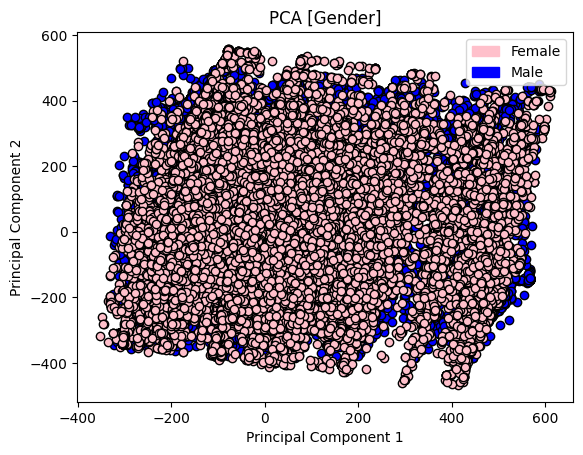

In [144]:
# PCA durchführen
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(scaledData)
pcF = pca.fit_transform(female)
pcM = pca.fit_transform(male)

plt.scatter(pcM[:, 0], pcM[:, 1], c="blue", edgecolor='k')
plt.scatter(pcF[:, 0], pcF[:, 1], c="pink", edgecolor='k')


plt.title('PCA [Gender]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
pink = mpatches.Patch(color='pink', label='Female')
blue = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[pink,blue])
plt.show()

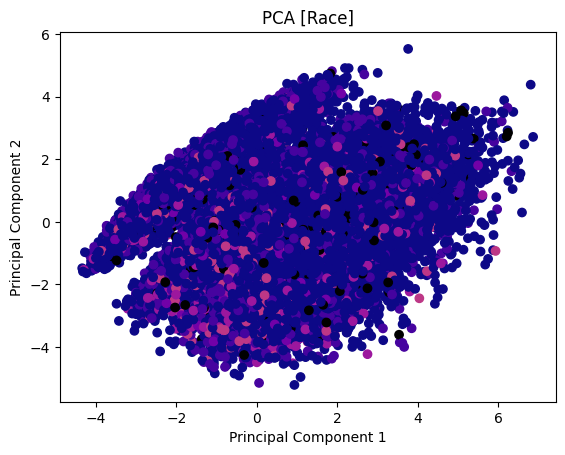

In [143]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colorsRace)
plt.title('PCA [Race]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

> Die Daten sind sehr homogen und es gibt wenige Ausreißer.

## 3D

In [ ]:
pca3D = PCA(n_components=3)
pcaFeatures3D = pca3D.fit_transform(scaledData)

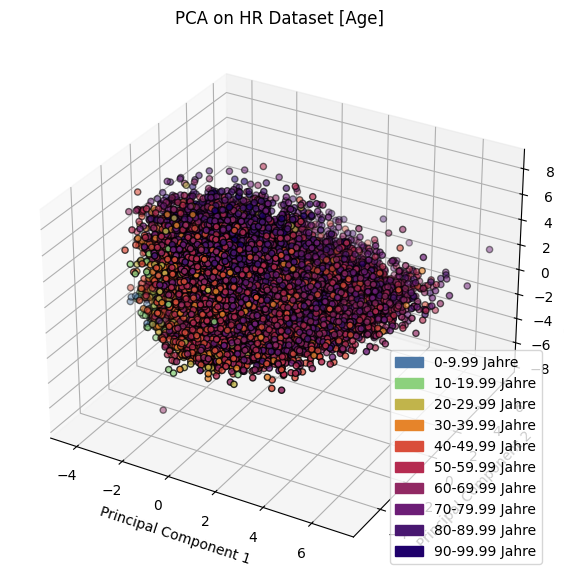

In [137]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(pcaFeatures3D[:, 0], pcaFeatures3D[:, 1], pcaFeatures3D[:, 2], c=colorsAge, edgecolor='k')
plt.title('PCA on HR Dataset [Age]')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
color1 = mpatches.Patch(color='#4e79a7', label='0-9.99 Jahre')
color2 = mpatches.Patch(color='#8cd17d', label='10-19.99 Jahre')
color3 = mpatches.Patch(color='#c1b44b', label='20-29.99 Jahre')
color4 = mpatches.Patch(color='#e6842a', label='30-39.99 Jahre')
color5 = mpatches.Patch(color='#d94d3a', label='40-49.99 Jahre')
color6 = mpatches.Patch(color='#b52b50', label='50-59.99 Jahre')
color7 = mpatches.Patch(color='#912963', label='60-69.99 Jahre')
color8 = mpatches.Patch(color='#6c1d76', label='70-79.99 Jahre')
color9 = mpatches.Patch(color='#481770', label='80-89.99 Jahre')
color10 = mpatches.Patch(color='#1f006b', label='90-99.99 Jahre')
plt.legend(handles=[color1,color2,color3,color4,color5,color6,color7,color8,color9,color10])
plt.show()

# t-SNE

In [129]:
# Berechnung
tsne = TSNE(n_components=2)
tsneData = tsne.fit_transform(scaledData)

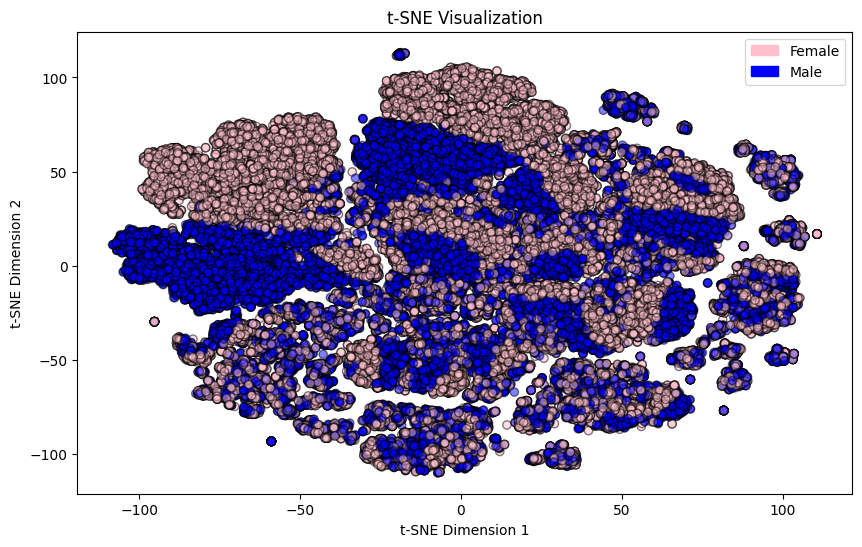

In [145]:
# Visualisierung der t-SNE-Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(tsneData[:, 0], tsneData[:, 1], marker='o', c=colorsGender, alpha=0.5, edgecolor="k")
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(handles=[pink, blue])
plt.show()

> man kann mehrere natürliche Cluster erkennen.

## UMAP

In [215]:
umapData = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=5).fit_transform(scaledData)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


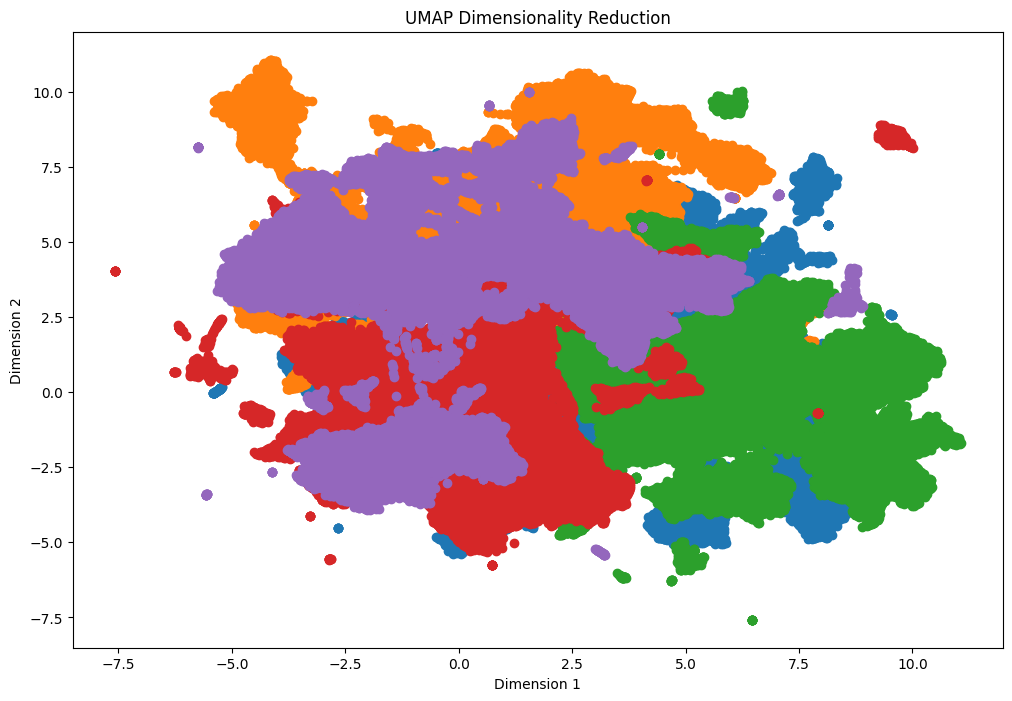

In [217]:
plt.figure(figsize=(12,8))
plt.title('UMAP Dimensionality Reduction')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.scatter(umapData[:,0], umapData[:,1])
plt.scatter(umapData[:,1], umapData[:,2])
plt.scatter(umapData[:,2], umapData[:,3])
plt.scatter(umapData[:,3], umapData[:,4])
plt.scatter(umapData[:,4], umapData[:,0])